In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Main packages
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # plot handling
from PIL import Image
import os, sys

In [3]:
import tensorflow as tf
import keras
from keras import layers, models, optimizers
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from keras.applications import ResNet50
tf.keras.applications.imagenet_utils.preprocess_input
tf.keras.applications.imagenet_utils.decode_predictions
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

#from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.preprocessing import image


In [4]:
base_dir= Path('/content/drive/MyDrive/Resized Indian Food Images')
main_path= os.listdir(base_dir)
print(len(main_path))
labels=[]

for i in main_path:
    labels=list(main_path)
print(labels)
    #print(f"{i}",end=",")

# Define parameters values
IMG_SIZE = (256, 256)
VALID_SPLIT = 0.3
BATCH_SIZE =64
SEED = 42
PATH = "../content/drive/MyDrive/Resized Indian Food Images"

# Get train image with generator
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)
# Get validation image with generator
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)


178
['waffles', 'steak', 'tuna_tartare', 'sutar_feni', 'strawberry_shortcake', 'tiramisu', 'sushi', 'takoyaki', 'tacos', 'unni_appam', 'spring_rolls', 'shankarpali', 'sheera', 'shrimp_and_grits', 'sohan_halwa', 'sheer_korma', 'shrikhand', 'spaghetti_carbonara', 'spaghetti_bolognese', 'sohan_papdi', 'seaweed_salad', 'rasgulla', 'sashimi', 'ravioli', 'red_velvet_cake', 'samosa', 'sandesh', 'risotto', 'ras_malai', 'scallops', 'ramen', 'prime_rib', 'pizza', 'pulled_pork_sandwich', 'pork_chop', 'qubani_ka_meetha', 'poha', 'poutine', 'pho', 'rabri', 'phirni', 'peking_duck', 'onion_rings', 'pancakes', 'omelette', 'paella', 'paneer_butter_masala', 'palak_paneer', 'oysters', 'panna_cotta', 'pad_thai', 'navrattan_korma', 'misti_doi', 'misi_roti', 'mysore_pak', 'miso_soup', 'malapua', 'naan', 'nachos', 'mussels', 'modak', 'makki_di_roti_sarson_da_saag', 'macarons', 'lassi', 'maach_jhol', 'ledikeni', 'macaroni_and_cheese', 'lobster_bisque', 'lyangcha', 'lasagna', 'litti_chokha', 'lobster_roll_sand

In [5]:
# Get class names
classes = train_ds.class_names
print(classes)

['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'apple_pie', 'ariselu', 'baby_back_ribs', 'baklava', 'bandar_laddu', 'basundi', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bhatura', 'bhindi_masala', 'bibimbap', 'biryani', 'boondi', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'butter_chicken', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'cheese_plate', 'cheesecake', 'chhena_kheeri', 'chicken_curry', 'chicken_quesadilla', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chicken_wings', 'chikki', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka', 'deviled_eggs', 'dharwad_pedha', 'donuts', 'doodhpak', 'double_ka_meetha', 'dum_aloo', 'dumplings', 'edamame', 'eggs_benedict

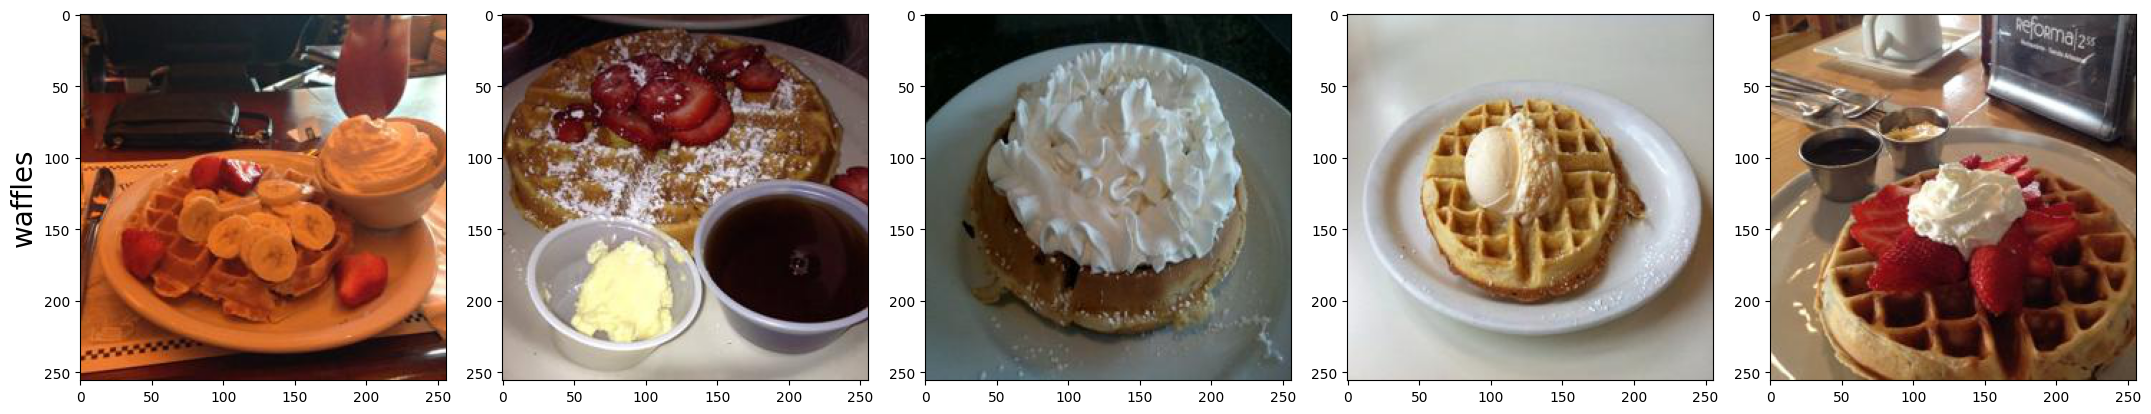

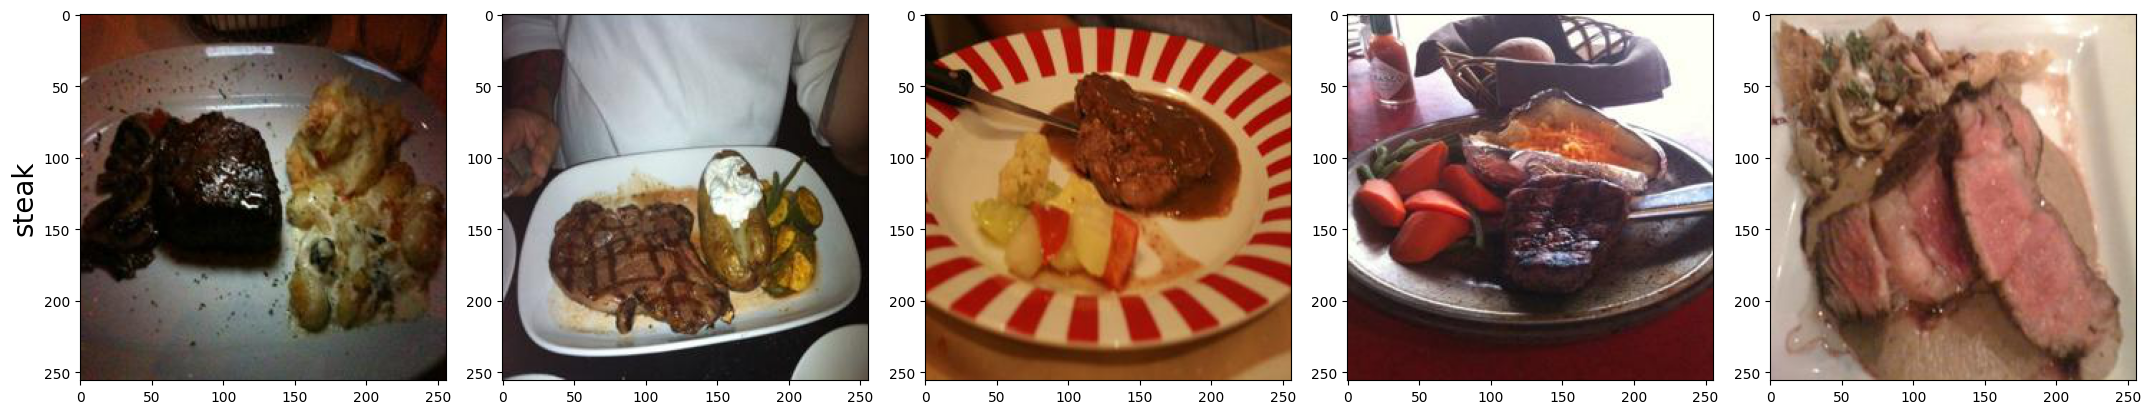

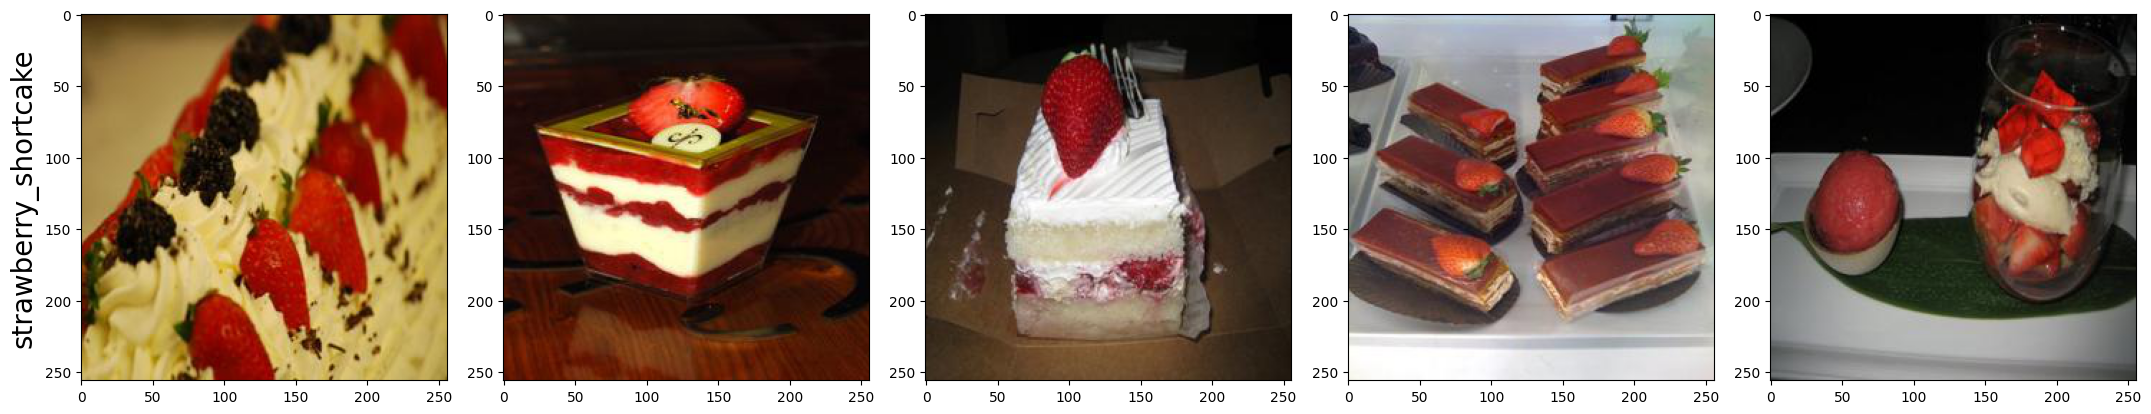

In [6]:
#plt.figure(figsize=(30,30))

for i in range(5):
    directory = os.path.join(base_dir, labels[i])
    #print(directory)
    #print(len(directory))
    plt.figure(figsize=(30,30))
    for j in range(5):
        path =  os.listdir(directory)
        img = mpimg.imread(f"{directory}/{path[j]}")
        plt.subplot(7, 7, j+1)
        plt.imshow(img)
        
        if j== 0:
            plt.ylabel(labels[i], fontsize=20) 
    
    #plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    plt.tight_layout()
    plt.show()
     
     
    

       


# Preprocessing

In [7]:
# Data augmentation: kind of transformations
# Tensorflow-Keras packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
])

# Apply transformation to train data
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [8]:
augmented_train_ds = augmented_train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

nb_train_samples = 7749
nb_validation_samples = 3320
num_classes=len(classes)

inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='v1_inceptionV3', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_v1_inceptionV3.log')
model.summary()

 

#model.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
  


87910968/87910968 [==============================] - 6s 0us/step


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

# Model Training and saving the model

In [ ]:
history = model.fit(
        augmented_train_ds,
        epochs=30,
        validation_data=val_ds,
    )


Epoch 1/30


In [ ]:
model.save('/content/drive/MyDrive')

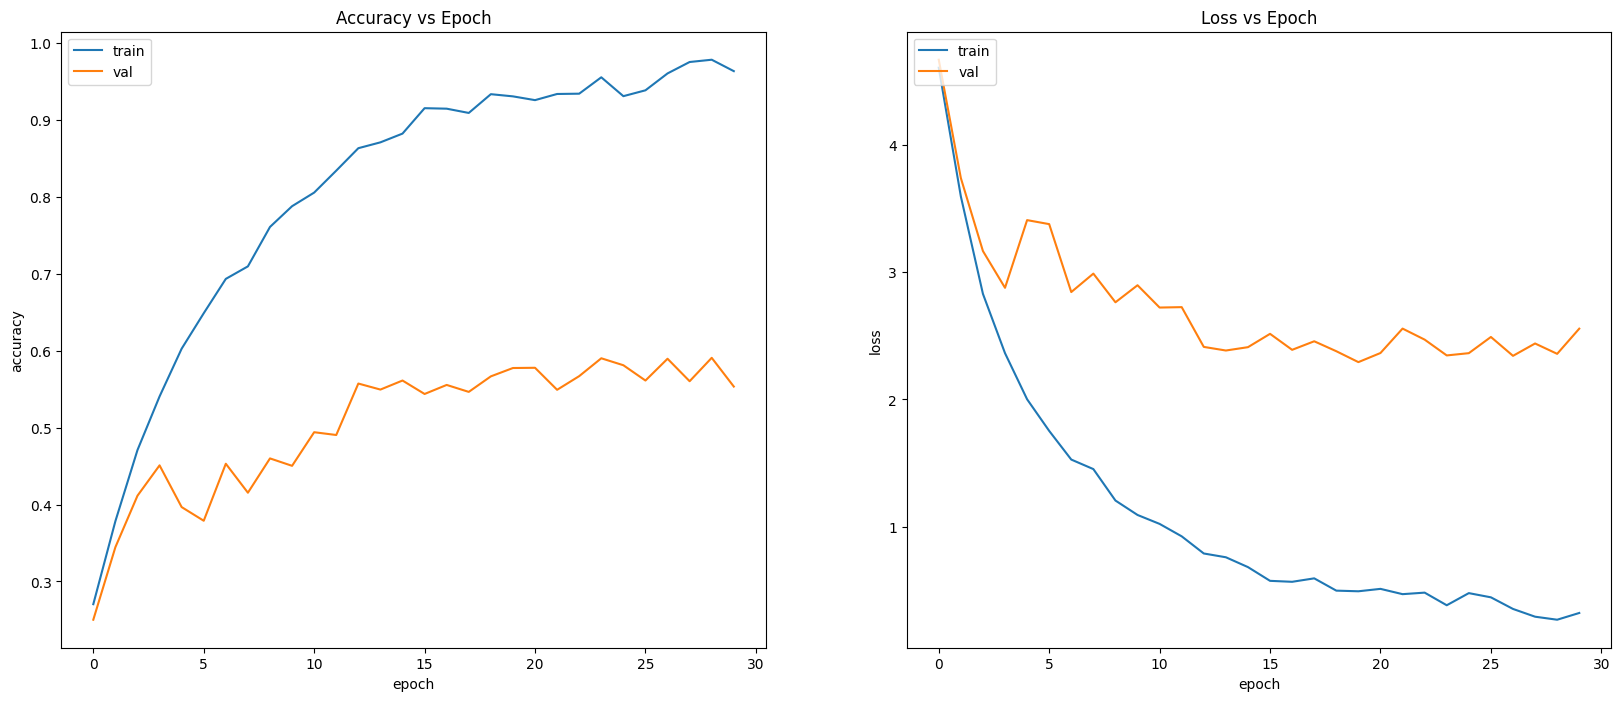

In [ ]:
# Create a plot layout
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Summarize history for accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Accuracy vs Epoch')
ax[0].set(xlabel='epoch', ylabel='accuracy')
ax[0].legend(['train', 'val'], loc='upper left')

# Summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper left')

# Display plots
plt.show()

In [ ]:
# serialize to JSON
json_file = model.to_json()
with open('/content/drive/MyDrive/Model.json', "w") as file:
   file.write(json_file)
# serialize weights to HDF5
model.save_weights('/content/drive/MyDrive/save_weights.h5')

NameError: ignored

# Loading the saved model

In [13]:
from keras.models import model_from_json
# load json and create model
file = open('/content/drive/MyDrive/Model.json', 'r')
model_json = file.read()
file.close()
loaded_model = model_from_json(model_json)
# load weights
loaded_model.load_weights('/content/drive/MyDrive/save_weights.h5')

In [14]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [15]:
#TO GENERATE BILL
name=input("Enter Customer's name:")
table_no=int(input("Enter the table:"))
n=int(input("Enter the number of food items:"))

Enter Customer's name:Esha
Enter the table:7
Enter the number of food items:2


<IPython.core.display.Javascript object>

Saved to photo.jpg


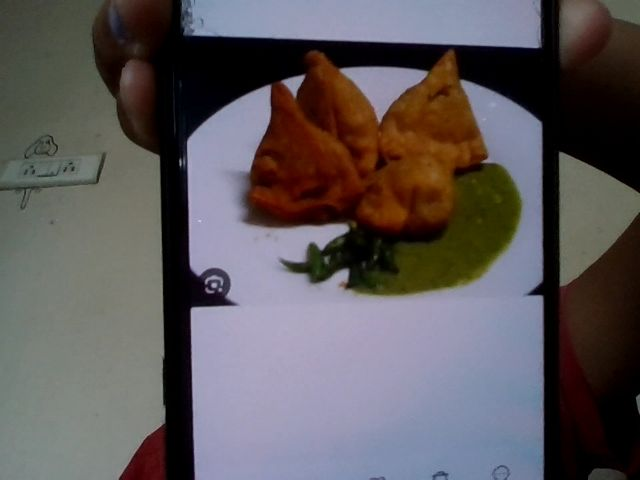

1/1 [==============================] - 10s 10s/step


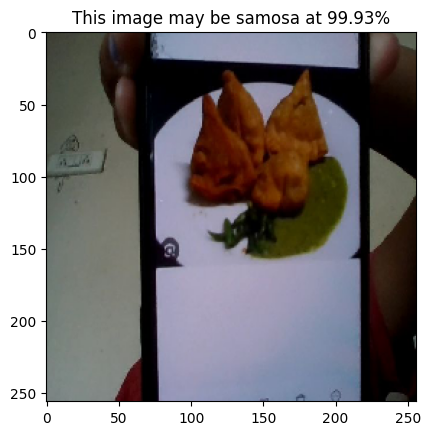

The content of the image is:
 samosa 153
List of food     samosa
Price                70
Calories_low        247
Calories_high       NaN
Name: 153, dtype: object


<IPython.core.display.Javascript object>

Saved to photo.jpg


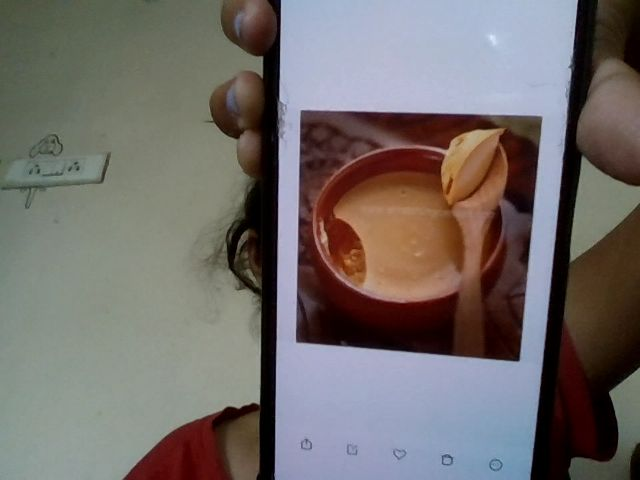

1/1 [==============================] - 0s 54ms/step


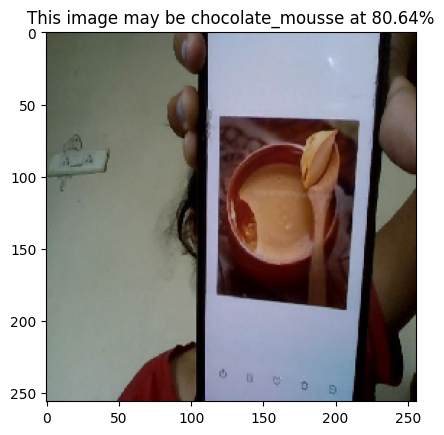

The content of the image is:
 chocolate_mousse 46
List of food     chocolate_mousse
Price                         180
Calories_low                  311
Calories_high                 NaN
Name: 46, dtype: object


In [16]:
s=0
import pandas as pd
p=[]
cl=[]
ch=[]
l=[]

excel_data = pd.read_excel('../content/drive/MyDrive/foodItems.xlsx')
      # Read the values of the file in the dataframe
data = pd.DataFrame(excel_data, columns=[
                          'List of food', 'Price', 'Calories_low', 'Calories_High'])

for i in range(n):
  from IPython.display import Image
  try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))
  #Run inference on data
  imgs = [filename]

  for img in imgs:
      try:
          # Load the image
          raw_img = keras.preprocessing.image.load_img(img, target_size=IMG_SIZE)
      except:
          continue
      

      # Conver to to numpy array
      img_array = keras.preprocessing.image.img_to_array(raw_img)
      
      # Reshaping
      img_array = tf.expand_dims(img_array, 0)  # Create batch axis
      
      # Make predictions
      predictions = loaded_model.predict(img_array)
      series      = pd.Series(predictions[0], index=classes)

      # Get score
      proba      = np.max(predictions)
      pred_class = classes[np.argmax(predictions)]
      
      list_of_food = excel_data['List of food'].tolist()
      price = excel_data['Price'].tolist()
      cal_low = excel_data['Calories_low'].tolist()
      cal_high = excel_data['Calories_High'].tolist()

      for i in range(0,len(list_of_food)):
        if pred_class == list_of_food[i]:
          l.append(pred_class)
          p.append(price[i])
          cl.append(cal_low[i])
          ch.append(cal_high[i])
      # Display results
      #fig, ax = plt.subplots(2, 2, figsize=(24, 4))
      
      plt.imshow(raw_img)
      plt.title(f"This image may be {pred_class} at {round(proba * 100,2)}%")

      
          

    
  plt.show()
  '''      
  fig, ax = plt.subplots(2, 2, figsize=(100, 12))

  series.plot(kind='bar', ax=ax[0,0], color='green')
  ax[0,0].title.set_text("Probabilities")
  ax[0,0].tick_params(labelrotation=90)
  ''' 
      # Import pandas
  import pandas as pd

      # Load the xlsx file
  excel_data = pd.read_excel('../content/drive/MyDrive/foodItems.xlsx')
      # Read the values of the file in the dataframe
  data = pd.DataFrame(excel_data, columns=[
                          'List of food', 'Price', 'Calories_low', 'Calories_high'])
      # Print the content
  list_of_food = excel_data['List of food'].tolist()
  for i in range(0,len(list_of_food)):
    if pred_class == list_of_food[i]:
      break
  print("The content of the image is:\n", pred_class,i)
  print(data.iloc[i])


      



In [17]:
print("The ordered item of foods and prices are :")
for i in range(len(l)):
  print(f'{l[i]}    Rs.{p[i]}')
print()
print("Total bill : Rs",sum(p))
print("Minimum Calories Consumed :",sum(cl))
print("Maximum Calories Consumed :",sum(ch))

The ordered item of foods and prices are :
samosa    Rs.70
chocolate_mousse    Rs.180

Total bill : Rs 250
Minimum Calories Consumed : 558
Maximum Calories Consumed : 598
